In [68]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [69]:
## concatenating multiple files together
directory = "C:/Users/khalilli.k/OneDrive - Procter and Gamble/Desktop/Python/datasets/datasets"
entries = os.listdir(directory)
csv_files =  [file for file in entries if file.endswith('.csv')] 
df_list = []
for filename in csv_files:
    file_path = os.path.join(directory,filename)
    
    df = pd.read_csv(file_path)
    df_list.append(df)
    
result_df = pd.concat(df_list, ignore_index=True)
result_df

,sale_time,purchaser_gender
0,2012-10-01 01:42:22,female
1,2012-10-01 02:24:53,female
2,2012-10-01 02:25:40,female
3,2012-10-01 02:30:42,female
4,2012-10-01 02:51:32,male
...,...,...
204324,2013-09-15 23:30:51,female
204325,2013-09-15 23:42:02,female
204326,2013-09-15 23:43:24,male
204327,2013-09-15 23:43:32,male


In [70]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204329 entries, 0 to 204328
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   sale_time         204329 non-null  object
 1   purchaser_gender  204329 non-null  object
dtypes: object(2)
memory usage: 3.1+ MB


In [71]:
#check_unique_sale_times
result_df['sale_time'].nunique()

203411

In [72]:
# #assuming no sale can happen at the exact day and time ,i decide to drop duplicates in sale_time column
# df.drop_duplicates('sale_time',inplace = True)
# duplicates_count = df['sale_time'].duplicated().sum()
# duplicates_count

In [73]:
## adding week_number column
result_df['weeknumber'] = pd.to_datetime(result_df['sale_time']).dt.isocalendar().week
result_df['weeknumber']

0         40
1         40
2         40
3         40
4         40
          ..
204324    37
204325    37
204326    37
204327    37
204328    37
Name: weeknumber, Length: 204329, dtype: UInt32

In [74]:
result_df['year'] = pd.to_datetime(result_df['sale_time']).dt.isocalendar().year
result_df['year']

0         2012
1         2012
2         2012
3         2012
4         2012
          ... 
204324    2013
204325    2013
204326    2013
204327    2013
204328    2013
Name: year, Length: 204329, dtype: UInt32

In [75]:
result_df = result_df.sort_values('sale_time', ascending = True)
result_df

,sale_time,purchaser_gender,weeknumber,year
0,2012-10-01 01:42:22,female,40,2012
1,2012-10-01 02:24:53,female,40,2012
2,2012-10-01 02:25:40,female,40,2012
3,2012-10-01 02:30:42,female,40,2012
4,2012-10-01 02:51:32,male,40,2012
...,...,...,...,...
204324,2013-09-15 23:30:51,female,37,2013
204325,2013-09-15 23:42:02,female,37,2013
204326,2013-09-15 23:43:24,male,37,2013
204327,2013-09-15 23:43:32,male,37,2013


## Plotting weekly sales for all 50 weeks

In [85]:
## group by week and year column
result_df_grouped = result_df.groupby(['weeknumber','year'])['purchaser_gender'].count().reset_index()
result_df_grouped = result_df_grouped.sort_values(by = ['year','weeknumber'])
## create a new column column 'week_year'
result_df_grouped['week_year'] = result_df_grouped['weeknumber'].astype(str) + '_' + result_df_grouped['year'].astype(str)
## rename column 'purchaser_gender' to 'weekly_sales' 
result_df_grouped.rename(columns = {'purchaser_gender' : 'weekly_sales'}, inplace = True)
## drop weeknumber and year columns
result_df_grouped.drop(columns = ['weeknumber','year'], inplace = True)
result_df_grouped

,weekly_sales,week_year
37,3545,40_2012
38,3440,41_2012
39,3451,42_2012
40,3463,43_2012
41,3696,44_2012
42,3554,45_2012
43,3526,46_2012
44,3624,47_2012
45,3622,48_2012
46,3417,49_2012


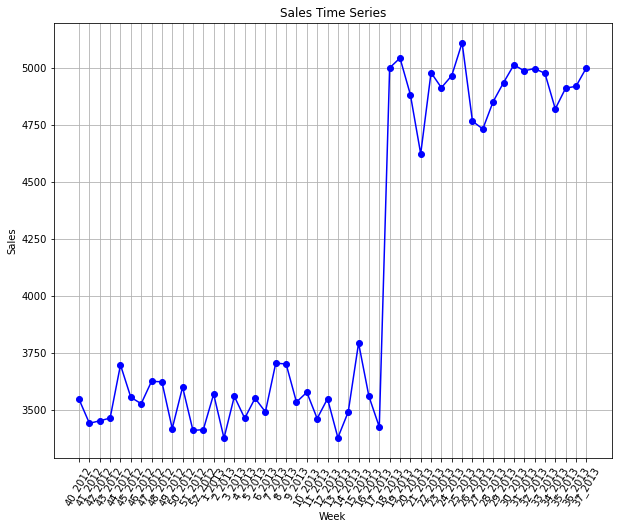

In [105]:
plt.figure(figsize=(10, 8))
plt.plot(result_df_grouped['week_year'], result_df_grouped['weekly_sales'], marker='o', linestyle='-', color='b')
plt.title('Sales Time Series')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation = 60)
plt.show()

Week 40


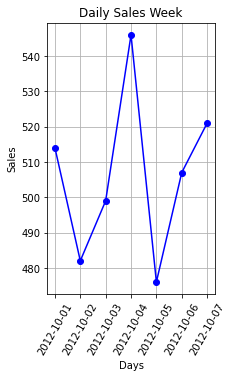

Week 41


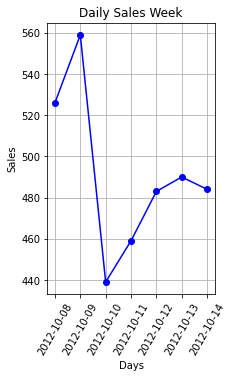

Week 42


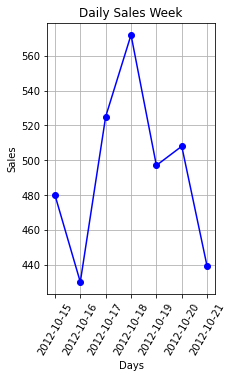

Week 43


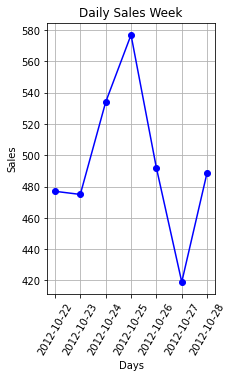

Week 44


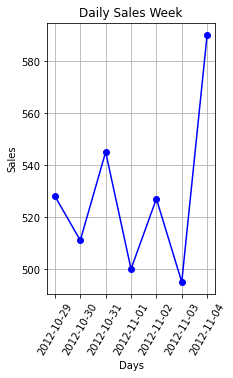

Week 45


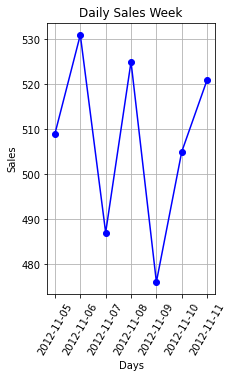

Week 46


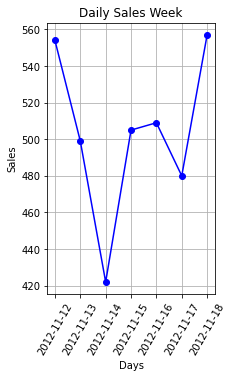

Week 47


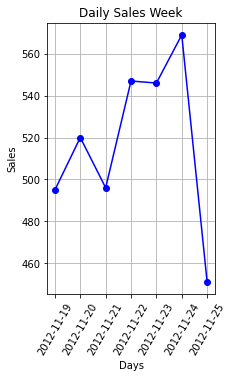

Week 48


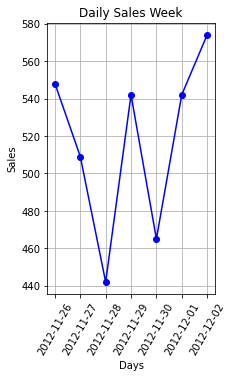

Week 49


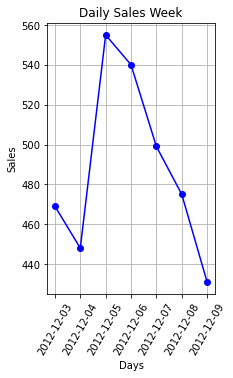

Week 50


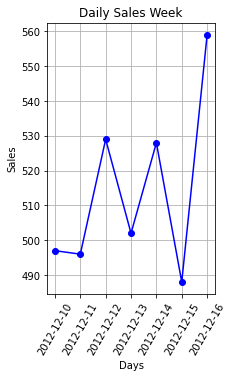

Week 51


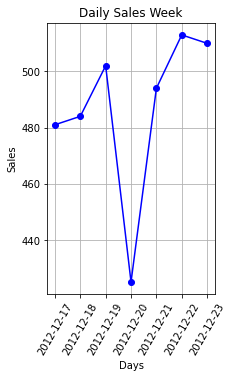

Week 52


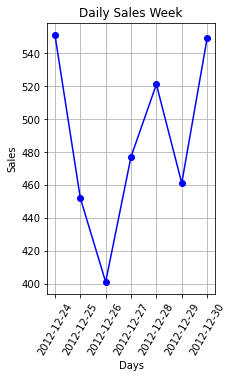

Week 1


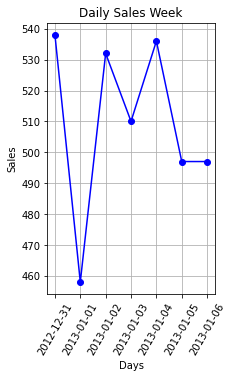

Week 2


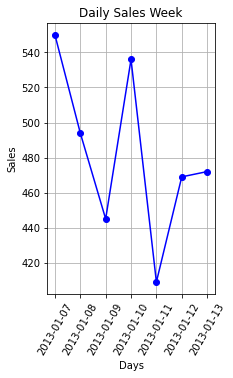

Week 3


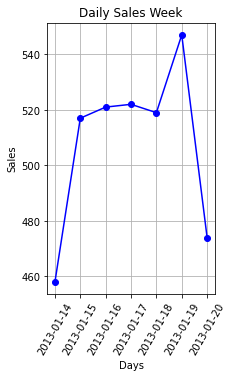

Week 4


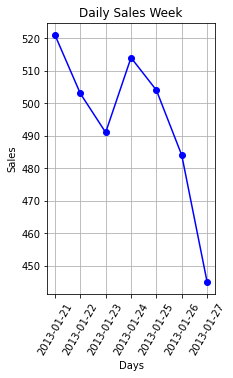

Week 5


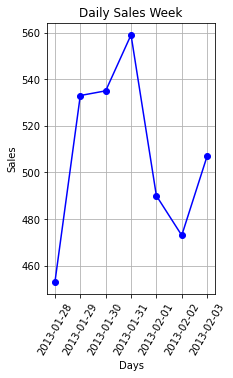

Week 6


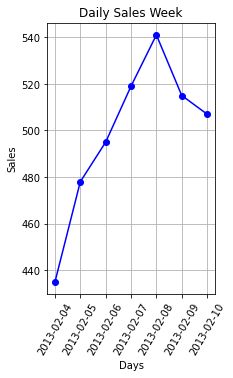

Week 7


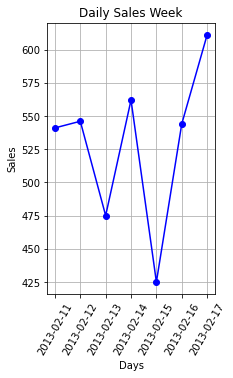

Week 8


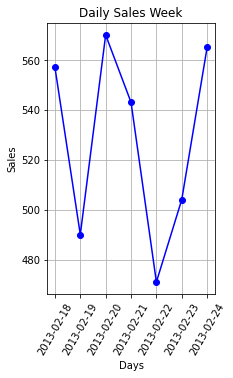

Week 9


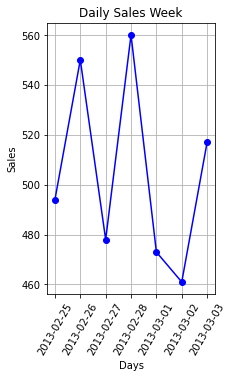

Week 10


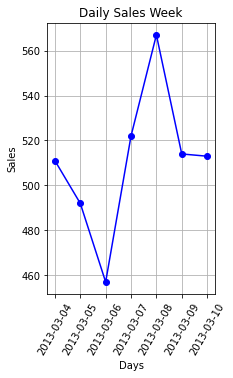

Week 11


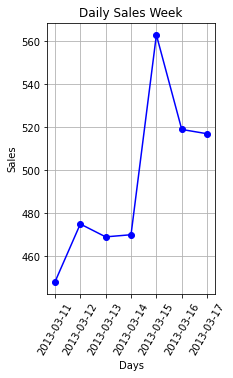

Week 12


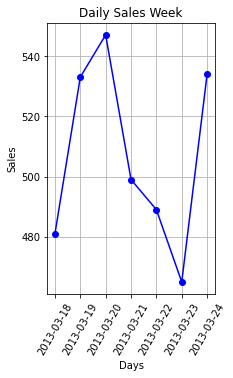

Week 13


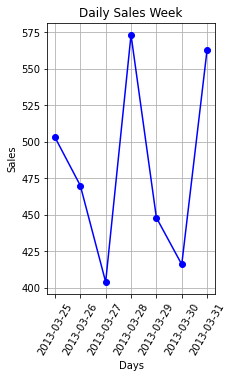

Week 14


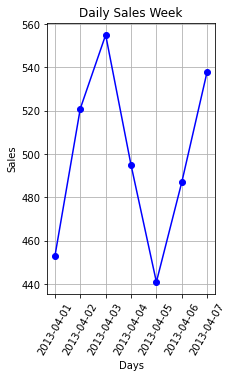

Week 15


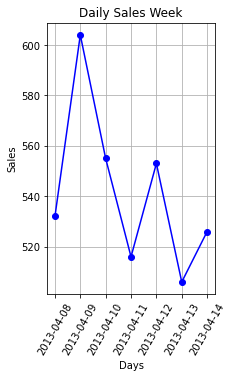

Week 16


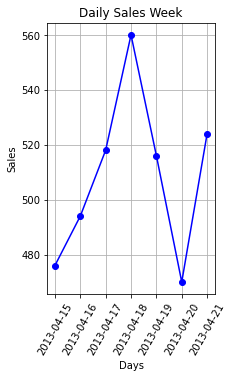

Week 17


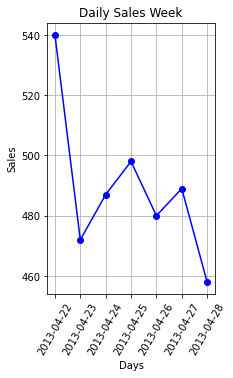

Week 18


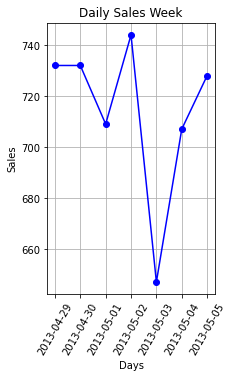

Week 19


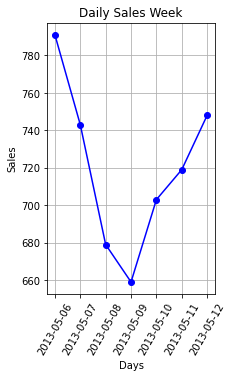

Week 20


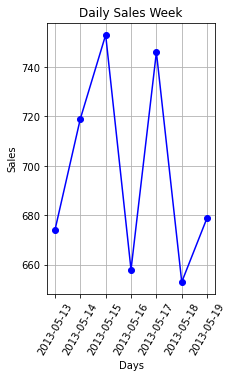

Week 21


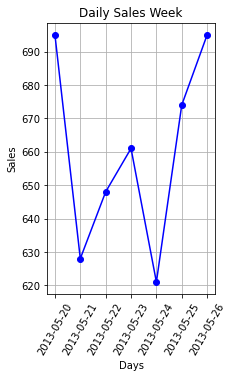

Week 22


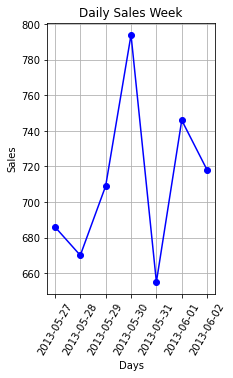

Week 23


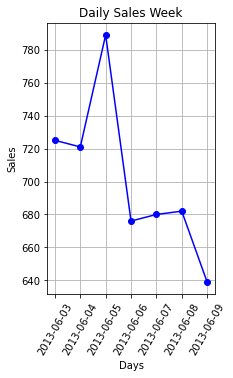

Week 24


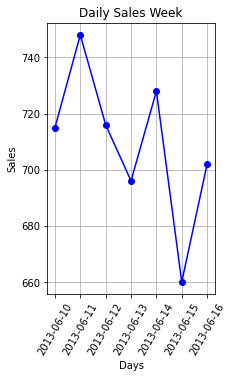

Week 25


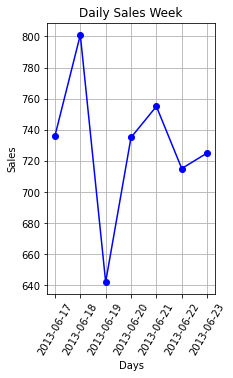

Week 26


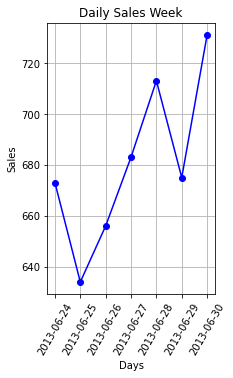

Week 27


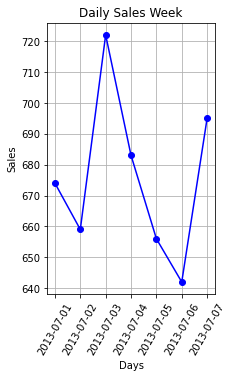

Week 28


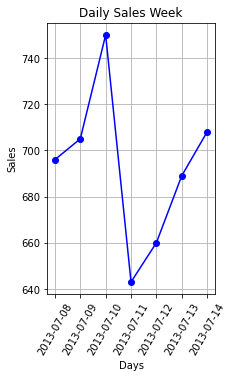

Week 29


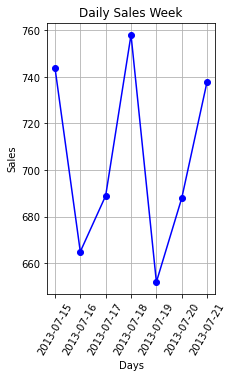

Week 30


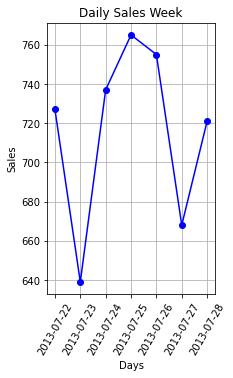

Week 31


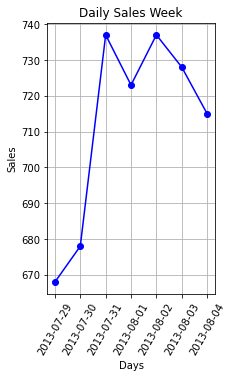

Week 32


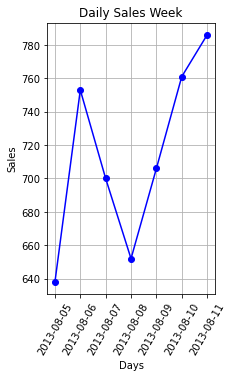

Week 33


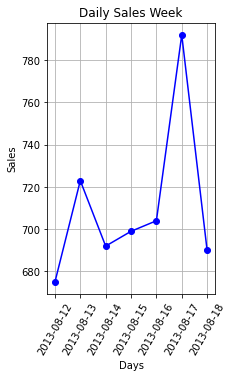

Week 34


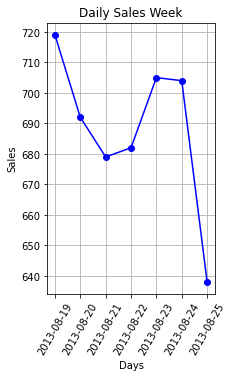

Week 35


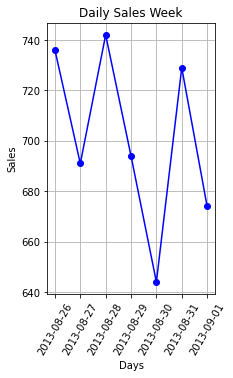

Week 36


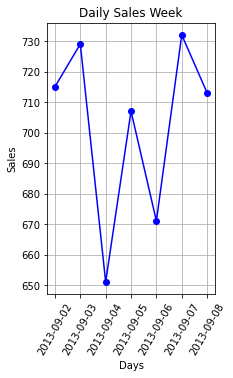

Week 37


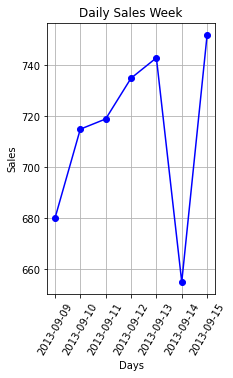

In [130]:
## plotting daily sales for all 50 weeks separately
for filename in csv_files:
    file_path = os.path.join(directory,filename)
    
    df = pd.read_csv(file_path)
    df['sale_day']  = pd.to_datetime(df['sale_time']).dt.date
    grouped_df = df.groupby('sale_day')['purchaser_gender'].count().reset_index()
    grouped_df['week'] = pd.to_datetime(df['sale_time']).dt.isocalendar().week
    print('Week',grouped_df['week'][0])
    plt.figure(figsize=(3, 5))
    plt.plot(grouped_df['sale_day'],grouped_df['purchaser_gender'],marker='o', linestyle='-', color='b')
    plt.title('Daily Sales Week')
    plt.xlabel('Days')
    plt.ylabel('Sales')
    plt.grid(True)
    plt.xticks(rotation = 60)
    plt.show()
    

In [ ]:
## plotting daily sales for all 50 weeks together

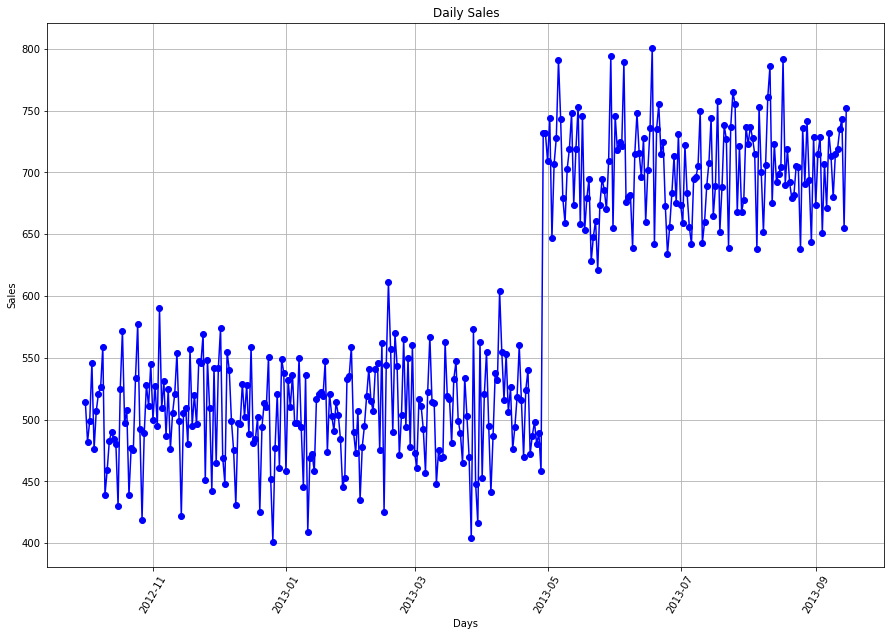

In [144]:
result_df['sale_day']  = pd.to_datetime(result_df['sale_time']).dt.date
result_df_grouped = result_df.groupby('sale_day')['purchaser_gender'].count().reset_index()
plt.figure(figsize=(15, 10))
plt.plot(result_df_grouped['sale_day'],result_df_grouped['purchaser_gender'],marker='o', linestyle='-', color='b')
plt.title('Daily Sales')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation = 60)
plt.show()